In [1]:
# Importing dependency
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 3)

# Data path, creating the model object and the name
data_path = '../../../input/Santos_Basin/Lake_PreSal_Santos_Basin_Well/v7/'
geo_model = gp.create_model('LakePreSal_V7')

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Teste with surfaces_points 3 and orientation points 3

In [3]:
# One line all model.

# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=[0, 4000, 0, 12000, -2000, 300],
             resolution=[250, 250, 200],
             path_i=data_path + "surfaces_points3.csv",
             path_o=data_path + "orientations_points3.csv",
             default_values=True)

# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_1_Series": ('ARIRI', 'UBV'),
                          "Strat_2_Series": ('LBV', 'ITAPEMA'),
                          "Basement_series": ('basement')})

# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True,
                    dtype="float64",
                    verbose=[],
                    )

# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)


Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range              12856.52
$C_o$            3935476.19
drift equations   [3, 3, 3]


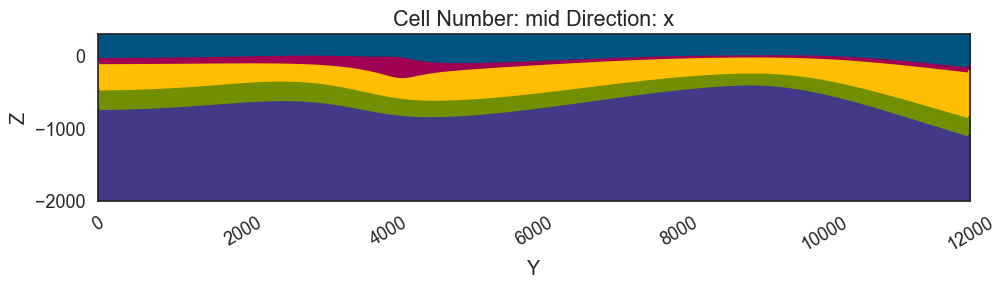

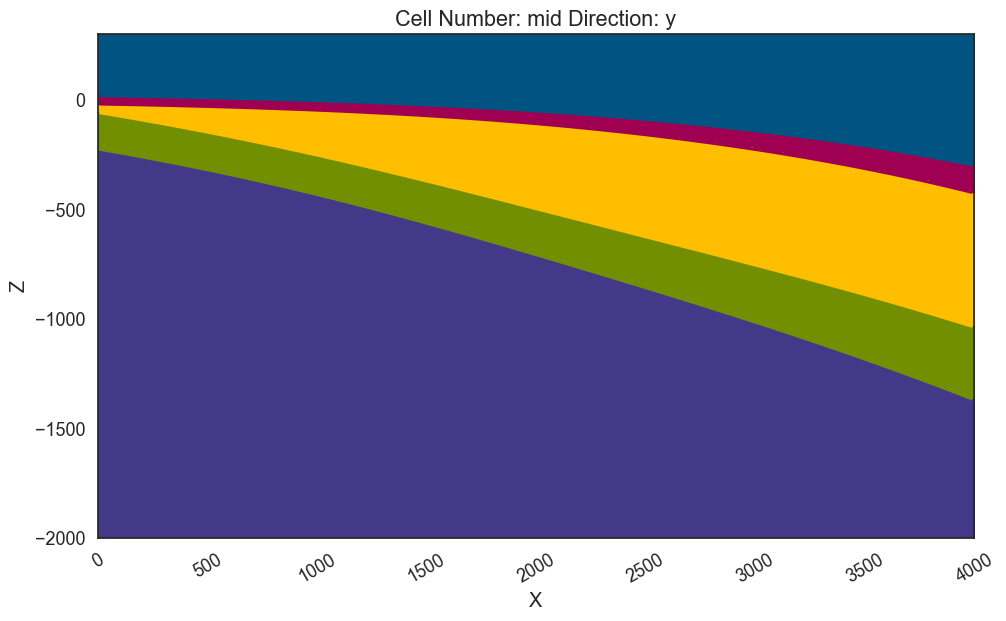

In [5]:
# 3D and 2D (Y and X) visualization
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)

ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True, show_results=True, show_lith=True, show_boundaries=True)

# ----------------------------------------------

# Step-by-step process

In [2]:
# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=[0, 4000, 0, 12000, -2000, 300],
             resolution=[200, 300, 300],
             path_i=data_path + "surfaces_points3.csv",
             path_o=data_path + "orientations_points3.csv",
             default_values=True)

Active grids: ['regular']


LakePreSal_V7  2023-06-06 15:56

In [ ]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_Series": ('ARIRI', 'UBV', 'LBV', 'ITAPEMA', 'basement')},
                          remove_unused_series=True)


In [3]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_1_Series": ('ARIRI', 'UBV'),
                          "Strat_2_Series": ('LBV', 'ITAPEMA'),
                          "Basement_series": ('basement')})

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[ 1.00000000e+01,  2.00000000e+01, -1.99616667e+03],
       [ 1.00000000e+01,  2.00000000e+01, -1.98850000e+03],
       [ 1.00000000e+01,  2.00000000e+01, -1.98083333e+03],
       ...,
       [ 3.99000000e+03,  1.19800000e+04,  2.80833333e+02],
       [ 3.99000000e+03,  1.19800000e+04,  2.88500000e+02],
       [ 3.99000000e+03,  1.19800000e+04,  2.96166667e+02]])

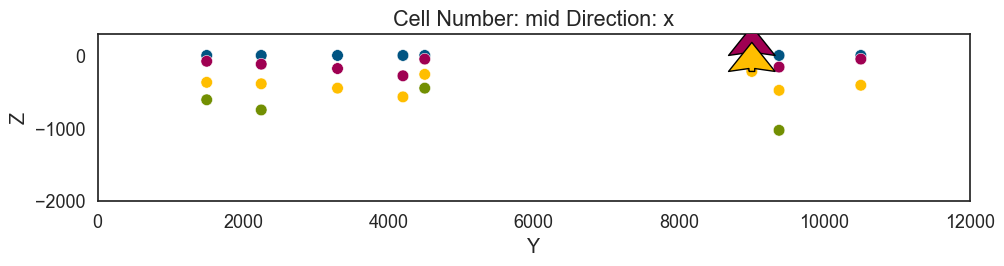

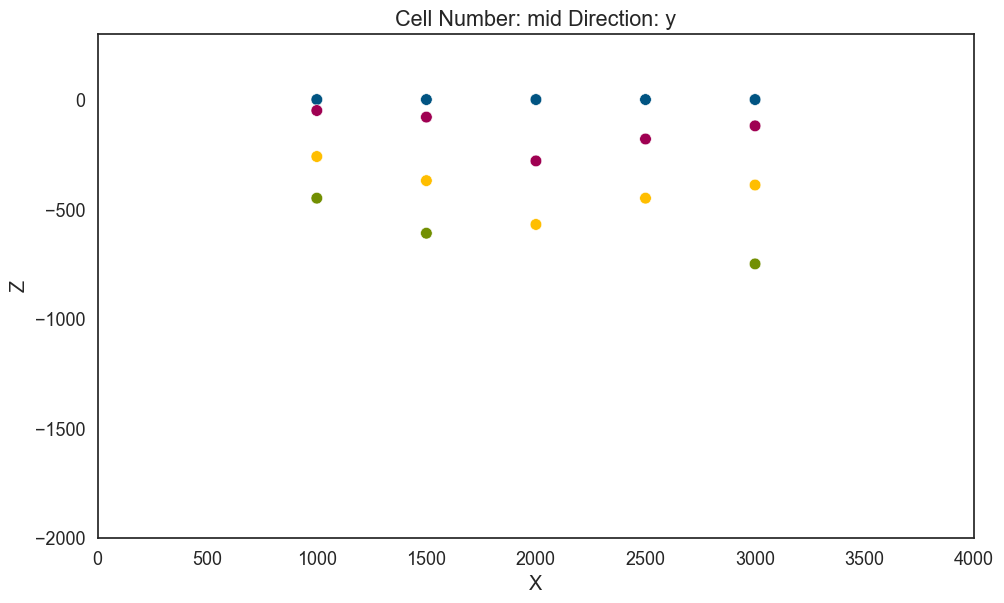

In [4]:
# Plot 2D of the data in X, Y and Z direction
gp.plot_2d(geo_model, direction=['x'], show_data=True, show_boundaries=True, legend=False, show=True)

gp.plot_2d(geo_model, direction=['y'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [ ]:
# Plot in 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

In [5]:
%%time
# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True,
                    dtype="float64",
                    verbose=[],
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range              12856.52
$C_o$            3935476.19
drift equations   [3, 3, 3]
Wall time: 19.6 s


In [6]:
%%time
# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 1min 34s


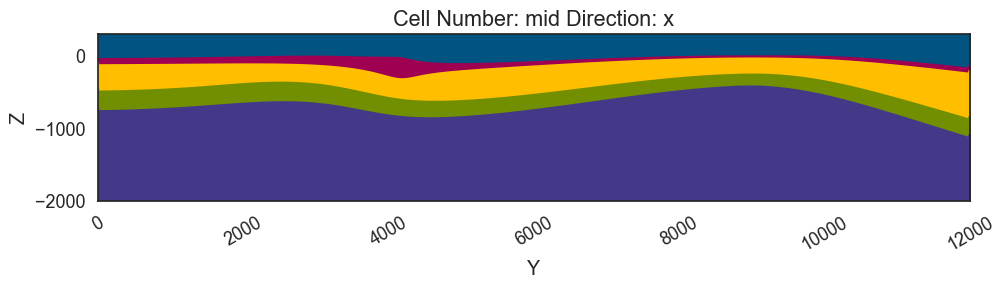

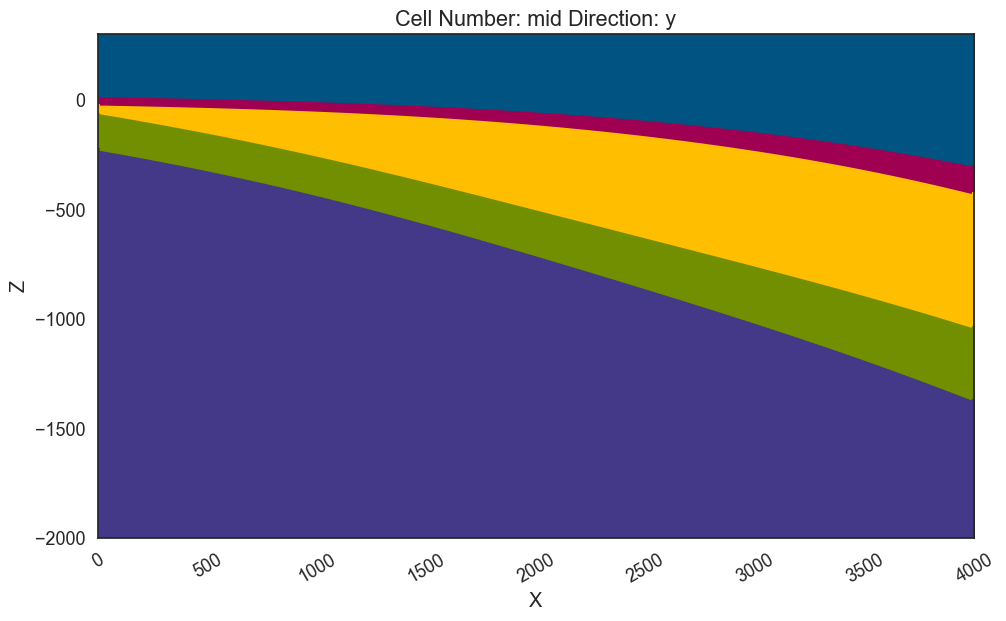

In [9]:
# Plot 2D of Y and X
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)

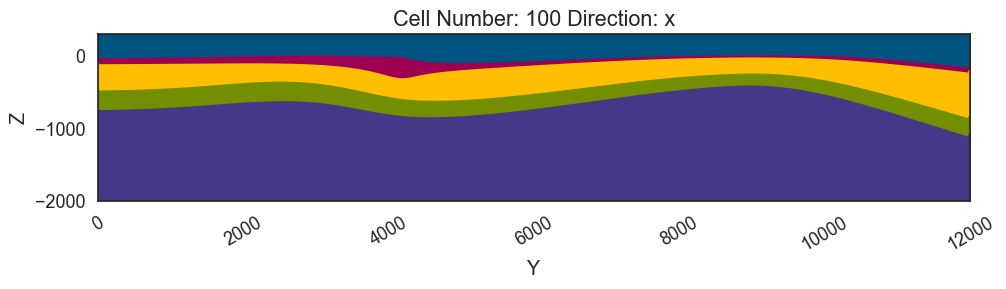

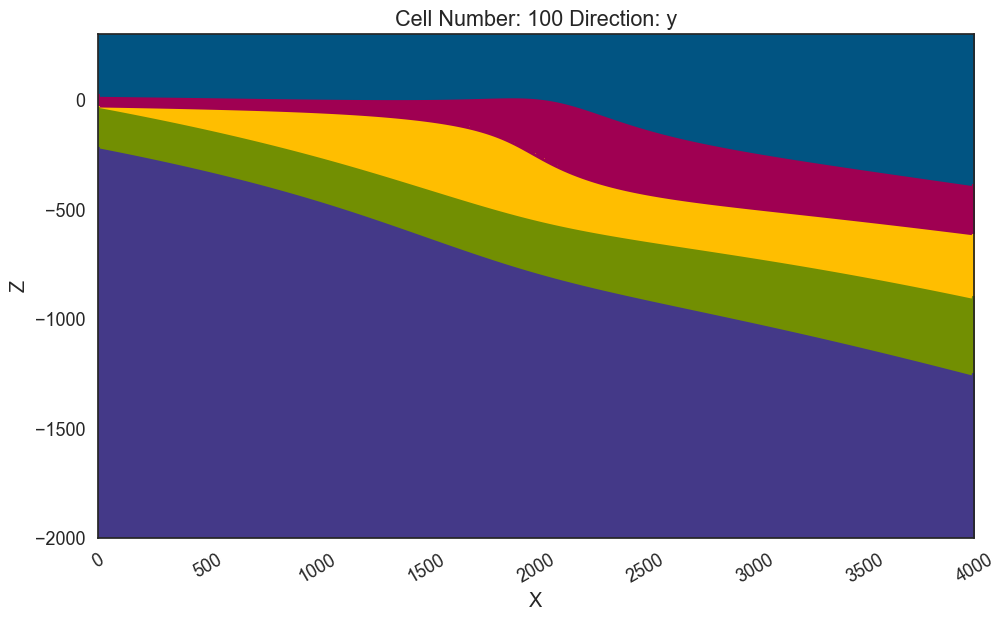

In [16]:
'''# Plot 2D of Y and X
gp.plot_2d(geo_model, cell_number=100, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, cell_number=100, direction="y", show_data=False, show_lith=True)'''

In [15]:
# Plot 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True, show_results=True, show_lith=True, show_boundaries=True)

In [ ]:
# Saving the model in a .zip file
'''
This code saves the model in a .zip file in 
the same folder that the .ipynb file is located
'''

#gp.save_model(geo_model, compress=True)

# ----------------------------------------------

# Teste 2 - surfaces/orientation points 2
### With synthetic ITAPEMA formations where there are no points in the article.

In [3]:
# One line all model.

# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=[0, 4000, 0, 12000, -2000, 300],
             resolution=[50, 50, 50],
             path_i=data_path + "surfaces_points2.csv",
             path_o=data_path + "orientations_points2.csv",
             default_values=True)

# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_1_Series": ('ARIRI', 'UBV'),
                          "Strat_2_Series": ('LBV', 'ITAPEMA'),
                          "Basement_series": ('basement')})

# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True,
                    dtype="float64",
                    verbose=[],
                    )

# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)


Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range              12856.52
$C_o$            3935476.19
drift equations   [3, 3, 3]


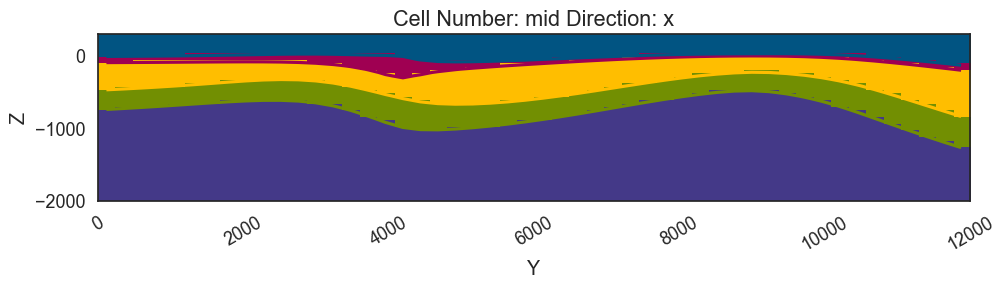

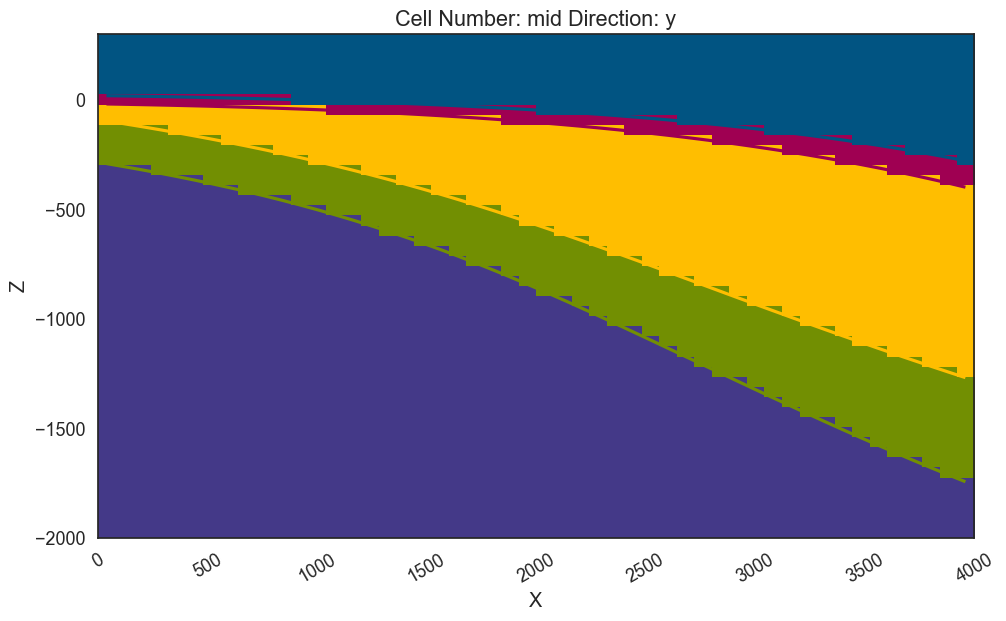

In [4]:
# 3D and 2D (Y and X) visualization
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)

ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True, show_results=True, show_lith=True, show_boundaries=True)

# ----------------------------------------------

# Teste 3 - surfaces/orientation points
### Distinct orientations and surface is similar to test 2 (however, there is a ariri point in the 2nd well that don't have in test 1 and 2)

In [2]:
# One line all model.

# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=[0, 4000, 0, 12000, -2000, 300],
             resolution=[50, 50, 50],
             path_i=data_path + "surfaces_points.csv",
             path_o=data_path + "orientations_points.csv",
             default_values=True)

# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_1_Series": ('ARIRI', 'UBV'),
                          "Strat_2_Series": ('LBV', 'ITAPEMA'),
                          "Basement_series": ('basement')})

# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True,
                    dtype="float64",
                    verbose=[],
                    )

# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)


Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range              12856.52
$C_o$            3935476.19
drift equations   [3, 3, 3]


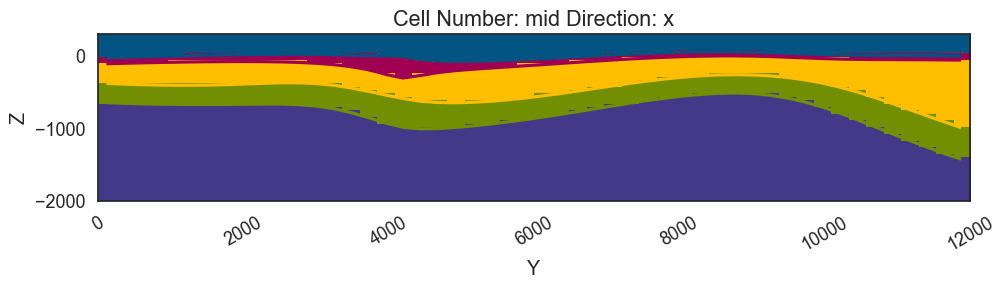

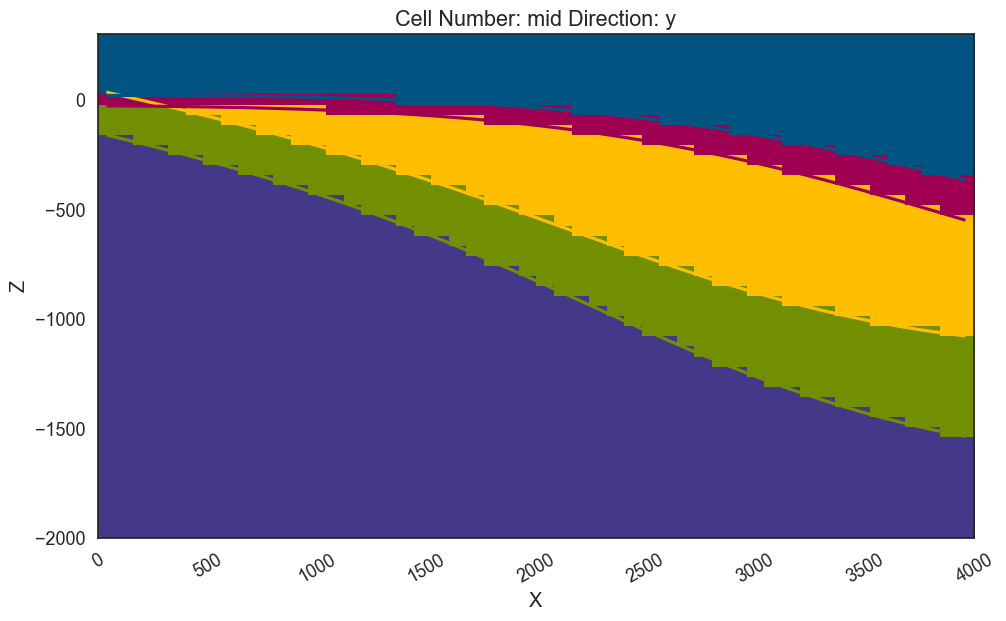

In [3]:
# 3D and 2D (Y and X) visualization
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)

ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True, show_results=True, show_lith=True, show_boundaries=True)

# ----------------------------------------------

# Test 4
### Trying the formations with more series with data 3

In [8]:
# One line all model.
extent = np.array([0, 4000, 0, 12000, -2000, 300])
resolution = 50, 50, 50
# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=extent,
             resolution=resolution,
             path_i=data_path + "surfaces_points.csv",
             path_o=data_path + "orientations_points.csv",
             default_values=True)

Active grids: ['regular']


LakePreSal_V7  2023-06-14 11:05

In [9]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_1_Series": ('ARIRI'),
                          "Strat_2_Series": ('UBV'),
                          "Strat_3_Series": ('LBV'),
                          "Strat_4_Series": ('ITAPEMA'),
                          "Basement_series": ('basement')})

,surface,series,order_surfaces,color,id
0,ARIRI,Strat_1_Series,1,#015482,1
1,UBV,Strat_2_Series,1,#9f0052,2
2,LBV,Strat_3_Series,1,#ffbe00,3
3,ITAPEMA,Strat_4_Series,1,#728f02,4
4,basement,Basement_series,1,#443988,5


In [10]:
# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True,
                    dtype="float64",
                    verbose=[],
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range                  12856.516
$C_o$                 3935476.19
drift equations  [3, 3, 3, 3, 3]


In [11]:
# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)

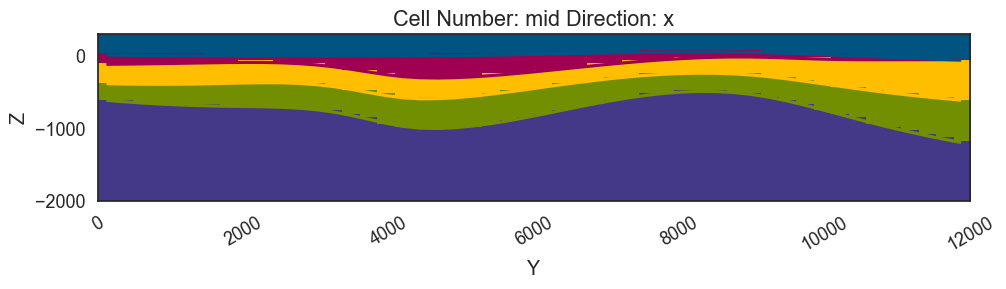

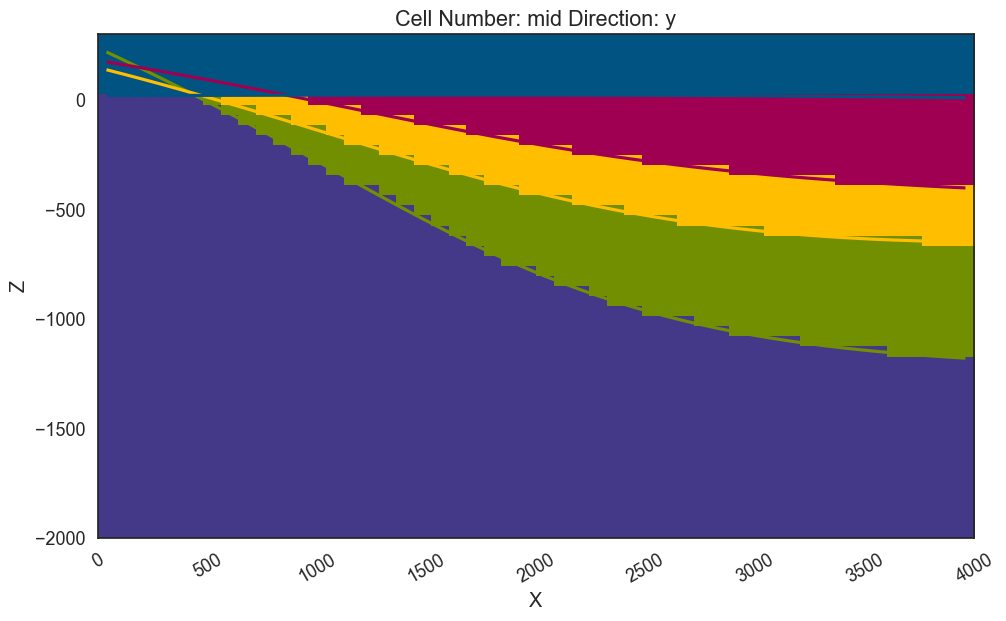

In [13]:
# 3D and 2D (Y and X) visualization
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)

ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True, show_results=True, show_lith=True, show_boundaries=True)

# ----------------------------------------------

# New test (More codes and optimization)

In [1]:
# Importing dependency
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Data path, creating the model object and the name
data_path = '../../../input/Santos_Basin/Lake_PreSal_Santos_Basin_Well/v7/'
geo_model = gp.create_model('Tests')
gp.init_data(geo_model,
             extent=[0, 4000, 0, 12000, -2000, 300],
             resolution=[50, 50, 50],
             path_i=data_path + "surfaces_points3.csv",
             path_o=data_path + "orientations_points3.csv")

Active grids: ['regular']


Tests  2023-06-22 17:00

In [3]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_1_Series": ('ARIRI', 'UBV'),
                          "Strat_2_Series": ('LBV', 'ITAPEMA'),
                          "Basement_series": ('basement')})

,surface,series,order_surfaces,color,id
0,ARIRI,Strat_1_Series,1,#015482,1
1,UBV,Strat_1_Series,2,#9f0052,2
2,LBV,Strat_2_Series,1,#ffbe00,3
3,ITAPEMA,Strat_2_Series,2,#728f02,4
4,basement,Basement_series,1,#443988,5


In [4]:
geo_model.delete_surface_points_basement()

True

In [4]:
gp.set_interpolator(geo_model,
                    output=['geology'],
                    compile_theano=True,
                    theano_optimizer='fast_run',
                    verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                          values
range              12856.515858
$C_o$            3935476.190476
drift equations       [3, 3, 3]


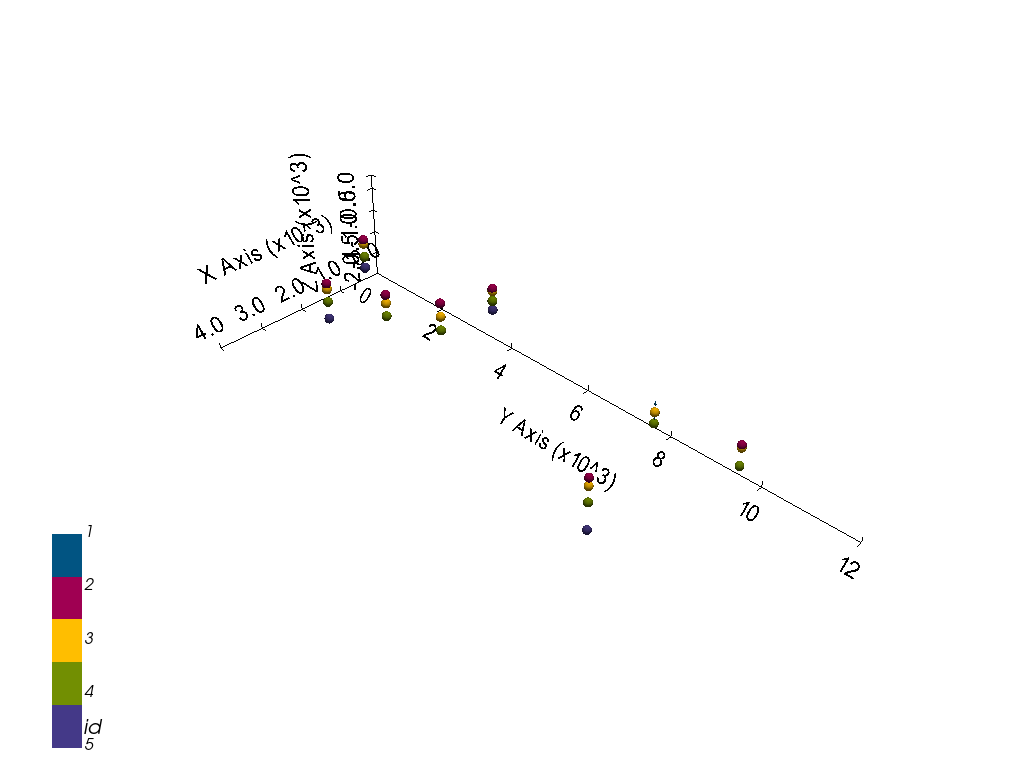

In [6]:
# Set up plotter
p3d = gp.plot_3d(geo_model, notebook=True)
# Plot data points and orientations
p3d.plot_data()

In [18]:
sol = gp.compute_model(geo_model, set_solutions=True)

In [28]:
# Set up plotter
p3d = gp.plot_3d(geo_model, notebook=False)

# Plot the surfaces
p3d.plot_surfaces()
# Plot the lithological units
p3d.plot_structured_grid('lith')

[StructuredGrid (0x19aa2122288)
   N Cells:	117649
   N Points:	125000
   X Bounds:	4.000e+01, 3.960e+03
   Y Bounds:	1.200e+02, 1.188e+04
   Z Bounds:	-1.977e+03, 2.770e+02
   Dimensions:	50, 50, 50
   N Arrays:	1,

In [19]:
geo_model.solutions.values_matrix

array([], shape=(0, 125000), dtype=float64)

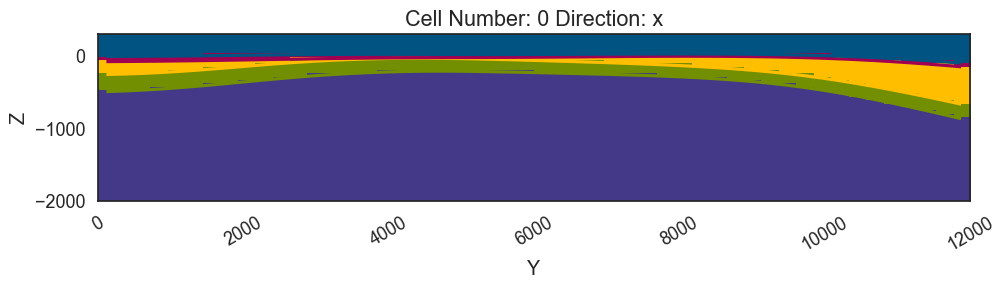

In [29]:
p2d = gp.plot_2d(geo_model, 
                 cell_number=0,
                 direction=['x'], 
                 show_data=False,
                 legend=False)

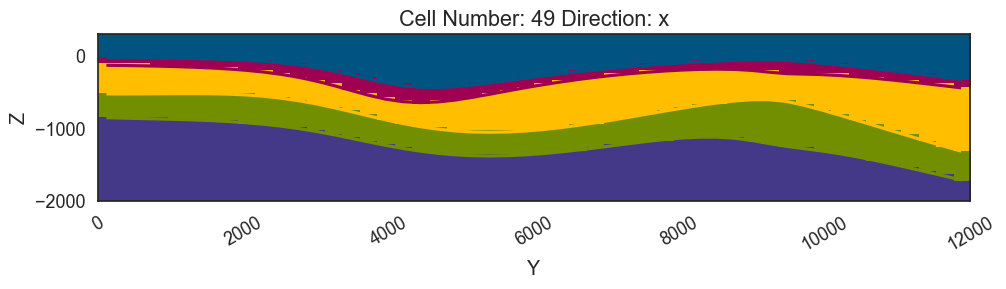

In [27]:
p2d = gp.plot_2d(geo_model, 
                 cell_number=49,
                 direction=['x'], 
                 show_data=False,
                 legend=False)